# Reaction flux fit

In [1]:
import alloregfit as arf
import pandas as pd
import cobra
import numpy as np

Load data and model:

In [2]:
data_dir = "//imsbnas.ethz.ch/Sauer1/users/Xavier/12_Karl_nonbiased_GS_new/"
results = pd.read_pickle(data_dir+"results_all.pickle")
#met_sd = pd.read_excel(data_dir+"metabolites.xlsx",sheetname=1,index_col="name")
reg_coli = pd.read_csv(data_dir+"SMRN.csv",index_col="rxn_id")
gold = pd.read_csv(data_dir+"gold_standard.csv",index_col="reaction")

cond = ['glc-NCM3722_1','glc-NQ1243_3','glc-NQ1243_4','glc-NQ1243_5','glu-NCM3722_9','glu-NQ393_11','glu-NQ393_12','glu-NQ393_13','glu-NQ393_14']
data_dir = '//imsbnas.ethz.ch/Sauer1/users/Xavier/3_Karl_data/'
model = cobra.io.load_matlab_model(data_dir+"iJO1366.mat")
fluxes = pd.read_excel(data_dir+"fluxes_GS.xlsx",index_col="name")[cond]
metabolites = pd.read_excel(data_dir+"merged_metabolites.xlsx",index_col="name")[cond]
metabolites_sd = pd.read_excel(data_dir+"merged_metabolites_sd.xlsx",index_col="name")[cond]
proteins = pd.read_excel(data_dir+"proteome.xlsx",index_col="name")[cond]
mapping = pd.read_table(data_dir+"ECOLI_83333_idmapping.dat",header=None)
rxn_id = open(data_dir+'reactions_GS2.txt').read().splitlines()
reg_coli = pd.read_csv(data_dir+"SMRN.csv",index_col="rxn_id")
summary = arf.define_reactions(rxn_id,model,fluxes,proteins,metabolites,metab_sd=metabolites_sd)

In [101]:
results['lik_cond']=[s[0] if isinstance(s,np.ndarray) else s for s in results['lik_cond']]
bools = np.array([True if isinstance(s,np.ndarray) else False for s in results['lik_cond']])
results = results.loc[bools]

In [102]:
val_bycond = arf.validate_bycond(results,summary,metabolites)

C:\Users\user\Documents\GitHub\AlloRegFit\alloregfit.py:961 RuntimeWarning: invalid value encountered in true_divide


In [103]:
data_dir = "//imsbnas.ethz.ch/Sauer1/users/Xavier/12_Karl_nonbiased_GS_new/"
val_bycond.to_pickle(data_dir+'validation_by_cond.pickle')

Reduce results to the best validates candidates.

In [104]:
reduced = pd.DataFrame(columns=results.columns)
for rxn in list(results['rxn_id'].drop_duplicates()):
    rxn_results = results.loc[results['rxn_id']==rxn]
    rxn_val = val_bycond.loc[val_bycond['rxn_id']==rxn]
    aic_noreg = rxn_val.loc[(rxn_val['regulator']==''),'AIC_weighted'].values[0]
    lik_noreg = rxn_val.loc[(rxn_val['regulator']==''),'lik_weighted'].values[0]
    idx1 = rxn_val.loc[(rxn_val['AIC_weighted']<=aic_noreg),'regulator']
    idx2 = rxn_val.loc[(rxn_val['lik_weighted']>=lik_noreg),'regulator']
    bools1 =[any(i[0] in s for s in idx1) if i!='' else True for i in rxn_results['regulator']]
    bools2 =[any(i[0] in s for s in idx1) if i!='' else True for i in rxn_results['regulator']]
    reduced = reduced.append(rxn_results.loc[bools1 and bools2])
reduced = reduced.sort_values(by='best_lik')
reduced.reset_index(drop=True,inplace=True)
reduced

best_fit   best_lik  \
0           K_3pg_c   K_atp_c      K_eq     K_adp_c... -23.790983   
1          K_atp_c   K_f6p_c         K_eq   K_adp_c... -22.539040   
2             K_3pg_c     K_atp_c      K_eq    K_ad... -22.527799   
3          K_3pg_c     K_atp_c      K_eq   K_adp_c ... -22.095184   
4             K_ac_c   K_atp_c      K_eq   K_adp_c ... -21.540659   
5             K_3pg_c   K_atp_c      K_eq       K_a... -21.344335   
6              K_3pg_c   K_atp_c      K_eq      K_a... -20.951622   
7          K_3pg_c   K_atp_c      K_eq   K_adp_c  K... -20.791390   
8        K_glu__L_c     K_nadp_c      K_eq   K_akg_... -20.462139   
9            K_dhap_c     K_cat_tpiA
18  26747.6985... -20.393836   
10           K_3pg_c   K_atp_c      K_eq       K_ad... -20.029767   
11          K_3pg_c    K_atp_c      K_eq   K_adp_c ... -19.852137   
12          K_3pg_c   K_atp_c      K_eq   K_adp_c  ... -19.775010   
13          K_akg_c  K_gln__L_c  K_nadph_c         ... -19.183437   
14           K_3pg_c   K_atp_c      K_eq   K_adp_c ... -19.022663   
15        K_g6p_c      K_eq    K_f6p_c  K_cat_pgi
6... -18.835944   
16         K_3pg_c      K_atp_c      K_eq       K_a... -18.576946   
17        K_3pg_c   K_atp_c      K_eq   K_adp_c  K_... -18.250703   
18      K_dhap_c  K_reg_suchms_c  K_cat_tpiA
7  7.0... -16.542609   
19       K_dhap_c  K_reg_3crsol_c    K_cat_tpiA
40 ... -16.231727   
20          K_dhap_c  K_reg_pydx5p_c     K_cat_tpiA... -15.744281   
21            K_atp_c   K_coa_c    K_succ_c      K_... -15.651227   
22          K_dhap_c  K_reg_sl2a6o_c     K_cat_tpiA... -15.619150   
23          K_dhap_c  K_reg_nadh_c    K_cat_tpiA
17... -15.312361   
24       K_dhap_c  K_reg_r5p_c  K_cat_tpiA
99  1.55... -15.199688   
25         K_g6p_c          K_eq      K_f6p_c  K_re... -14.821532   
26        K_atp_c      K_f6p_c         K_eq      K_... -14.731233   
27         K_fdp_c         K_eq  K_dhap_c  c_fbaB,g... -14.724033   
28        K_atp_c   K_f6p_c          K_eq     K_adp... -14.606274   
29            K_g6p_c          K_eq   K_f6p_c  K_re... -14.579082   
..                                                 ...        ...   
944        K_e4p_c      K_nad_c          K_eq   K_n...  82.360749   
945            K_e4p_c   K_nad_c           K_eq  K_...  82.604198   
946           K_e4p_c   K_nad_c         K_eq    K_n...  82.707876   
947       K_e4p_c       K_nad_c         K_eq    K_n...  82.996751   
948          K_e4p_c   K_nad_c      K_eq  K_nadh_c ...  83.099482   
949       K_e4p_c     K_nad_c           K_eq      K...  83.325427   
950            K_e4p_c   K_nad_c       K_eq   K_nad...  83.480662   
951          K_e4p_c   K_nad_c          K_eq     K_...  83.767704   
952           K_e4p_c  K_pep_c       K_eq  K_2dda7p...  84.604021   
953        K_e4p_c   K_nad_c         K_eq      K_na...  84.656811   
954        K_e4p_c   K_nad_c           K_eq      K_...  85.346239   
955        K_e4p_c   K_nad_c         K_eq  K_nadh_c...  85.698633   
956         K_e4p_c   K_nad_c          K_eq    K_na...  85.801440   
957       K_e4p_c   K_nad_c           K_eq   K_nadh...  86.143621   
958        K_e4p_c   K_nad_c        K_eq     K_nadh...  86.226796   
959        K_e4p_c   K_nad_c           K_eq     K_n...  86.348823   
960       K_e4p_c   K_nad_c        K_eq   K_nadh_c ...  86.370793   
961          K_e4p_c   K_nad_c         K_eq     K_n...  86.411477   
962         K_e4p_c   K_nad_c           K_eq     K_...  86.417672   
963          K_e4p_c   K_nad_c           K_eq   K_n...  86.519029   
964         K_e4p_c   K_nad_c         K_eq     K_na...  86.972397   
965        K_e4p_c  K_nad_c           K_eq  K_nadh_...  87.096967   
966       K_e4p_c   K_nad_c          K_eq     K_nad...  87.101911   
967       K_e4p_c  K_nad_c         K_eq      K_nadh...  87.628538   
968       K_e4p_c   K_nad_c          K_eq  K_nadh_c...  87.833296   
969       K_e4p_c  K_nad_c         K_eq    K_nadh_c...  88.140770   
970       K_e4p_c  K_nad_c           K_eq  K

Run alloregfit to obtain the predicted flux estimation:

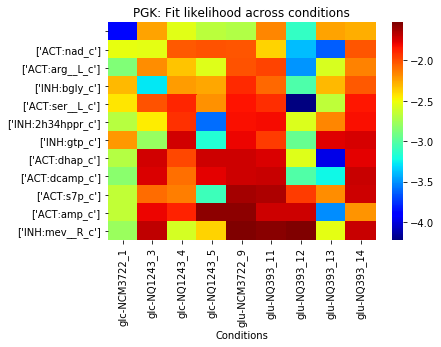

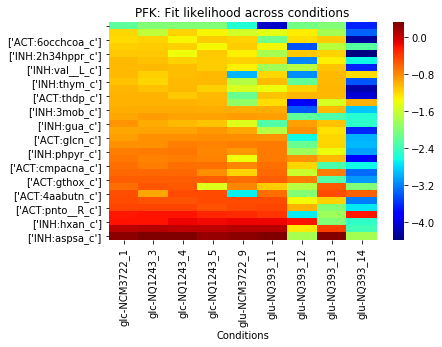

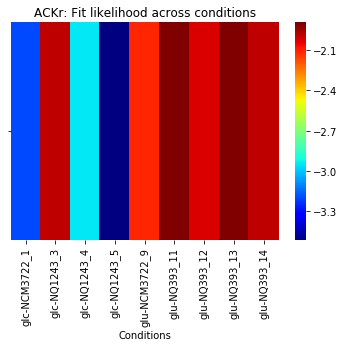

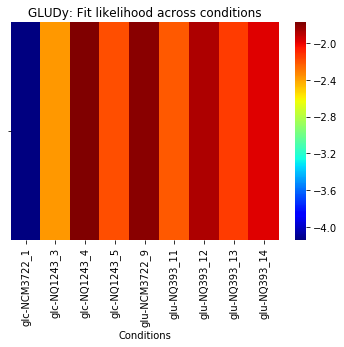

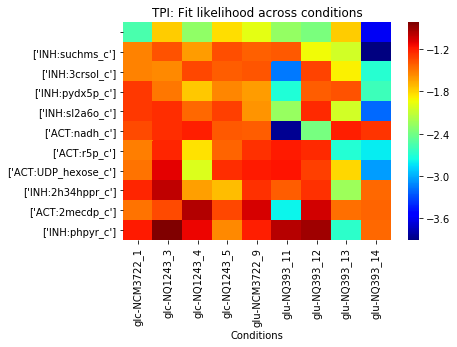

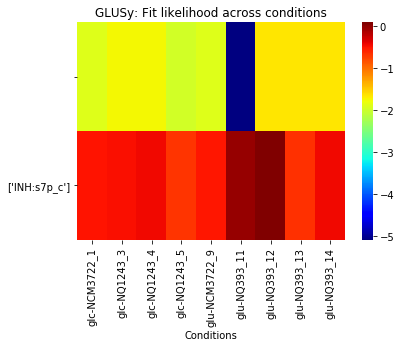

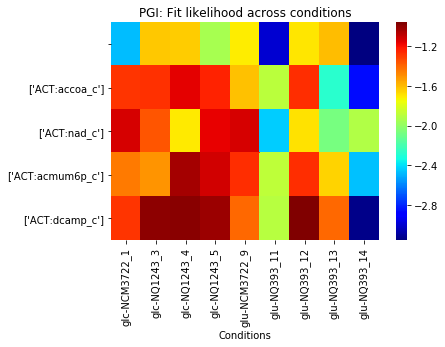

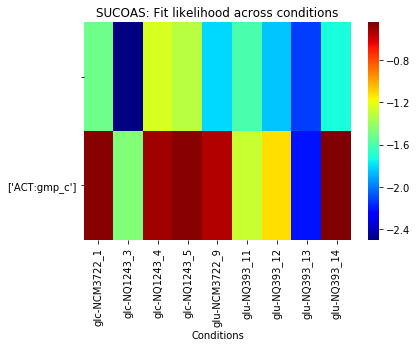

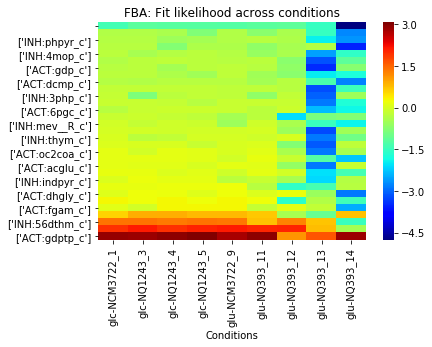

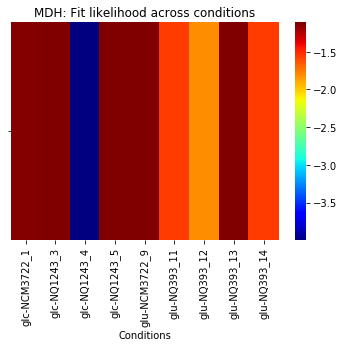

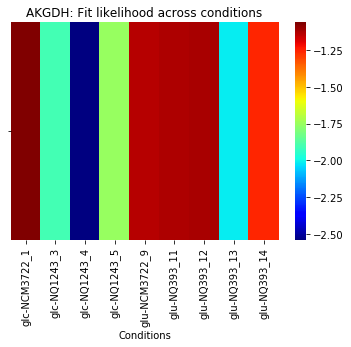

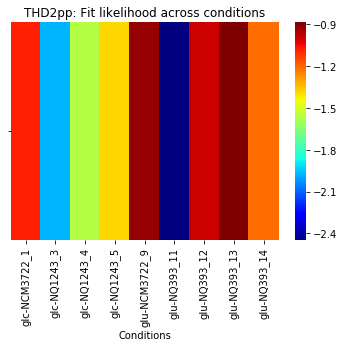

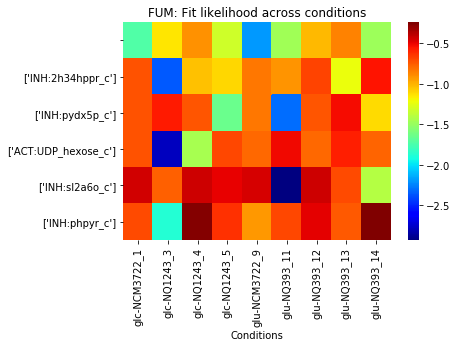

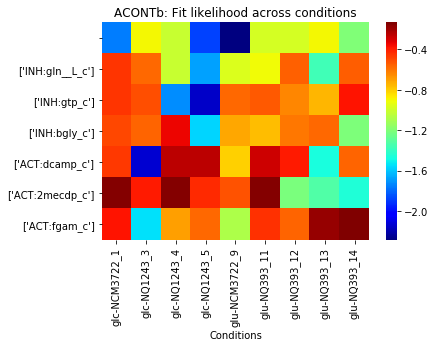

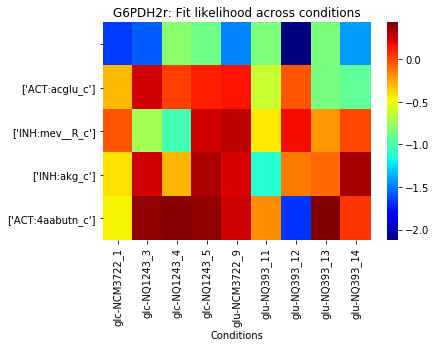

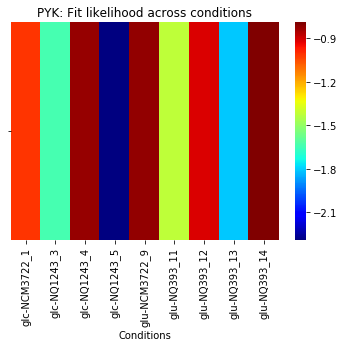

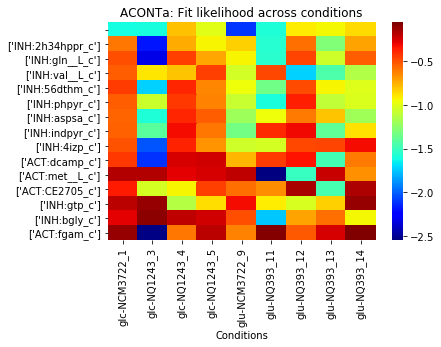

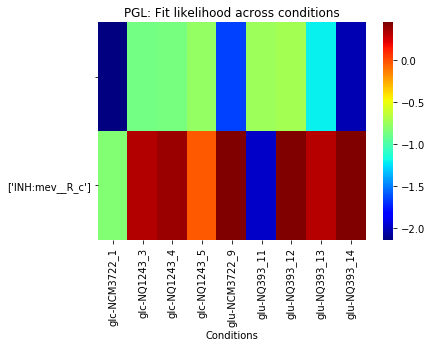

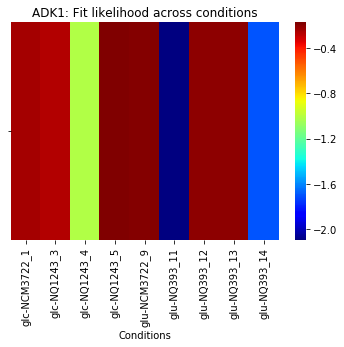

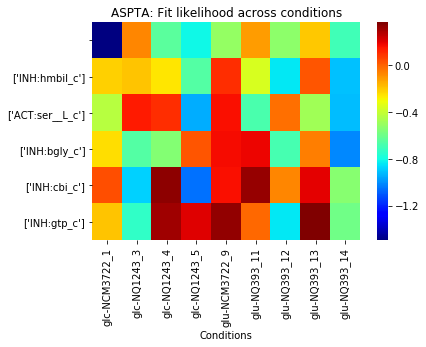

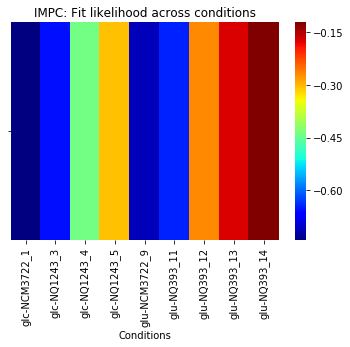

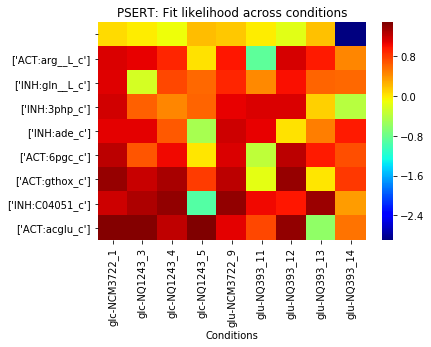

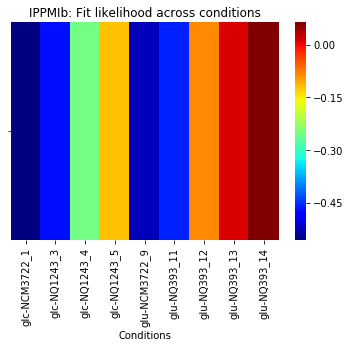

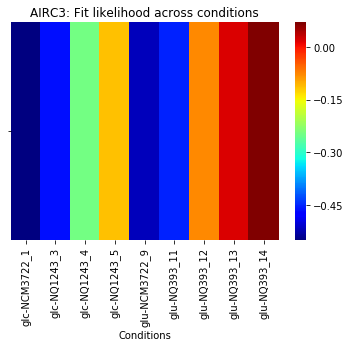

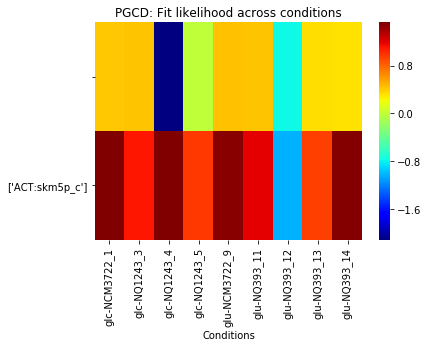

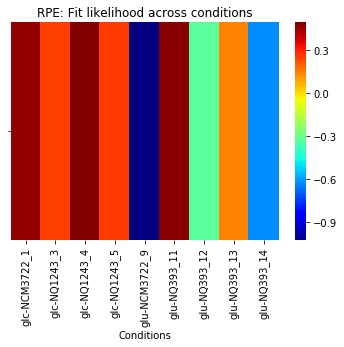

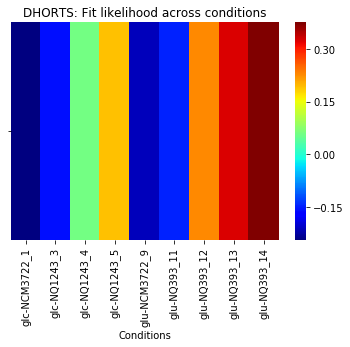

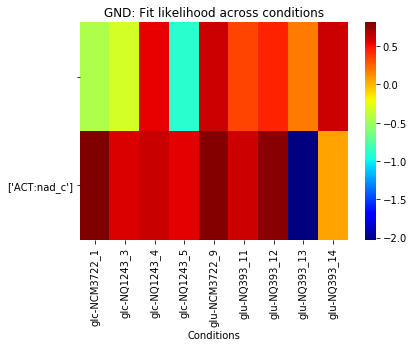

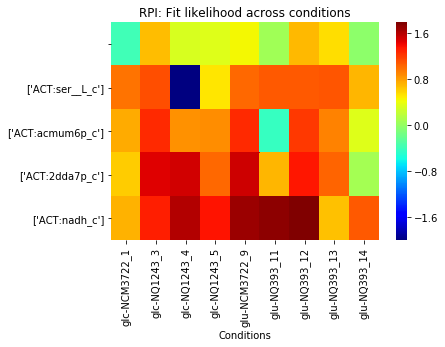

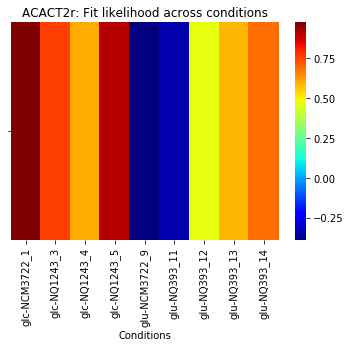

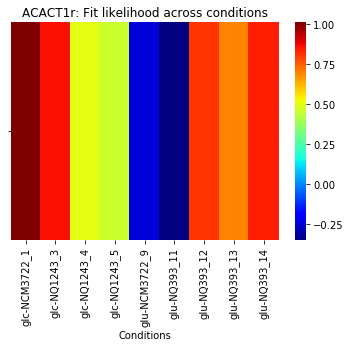

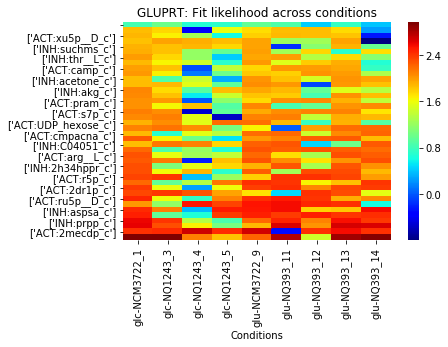

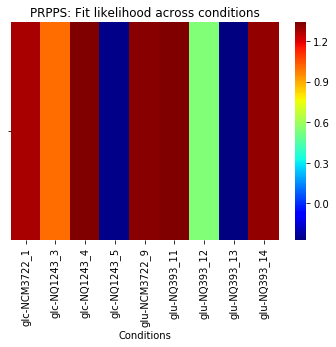

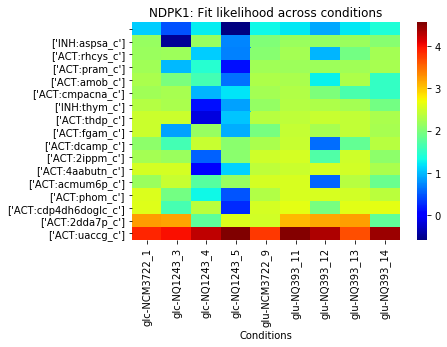

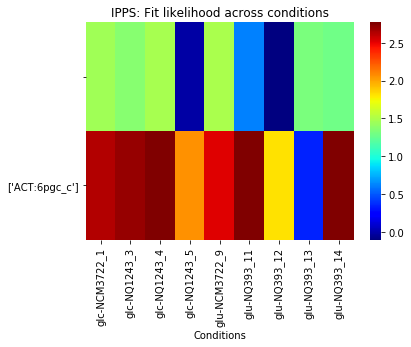

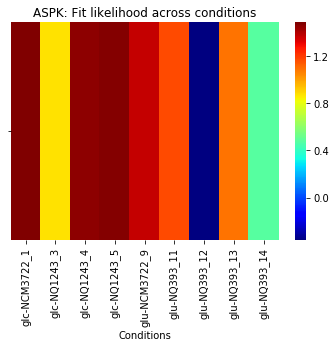

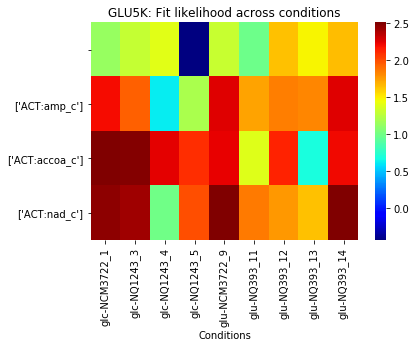

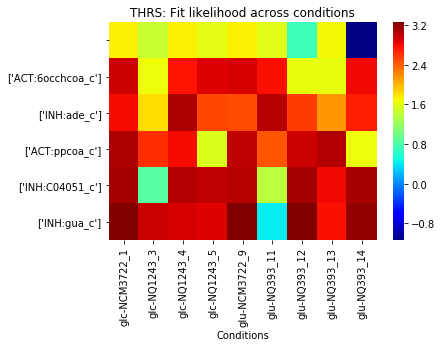

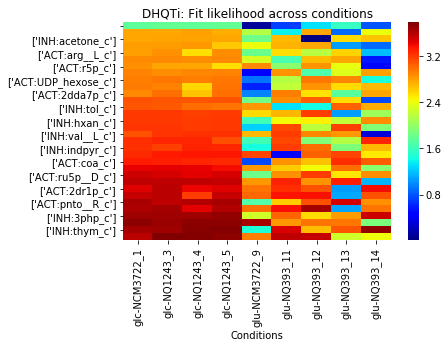

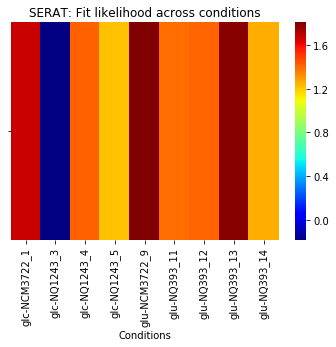

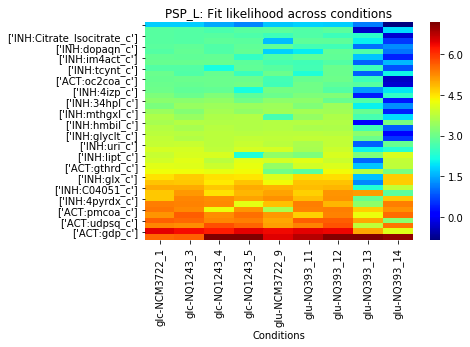

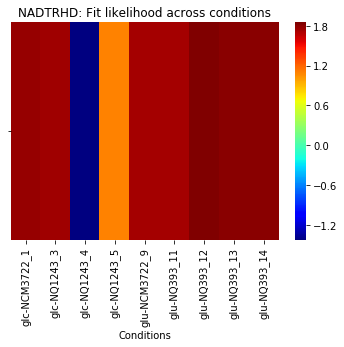

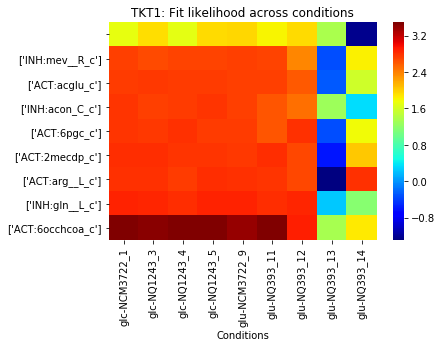

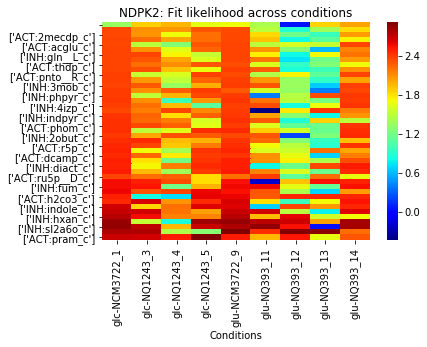

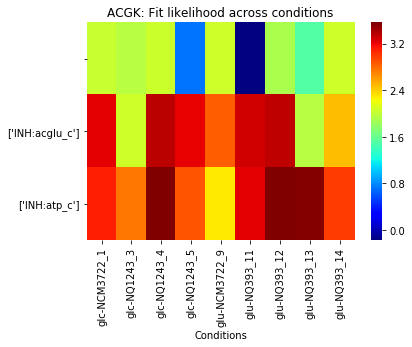

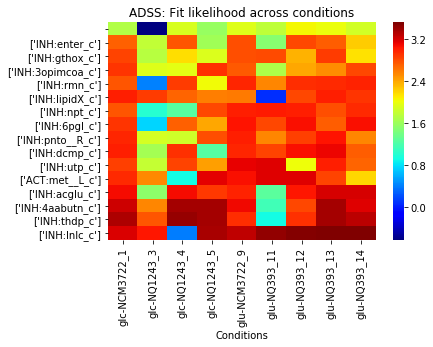

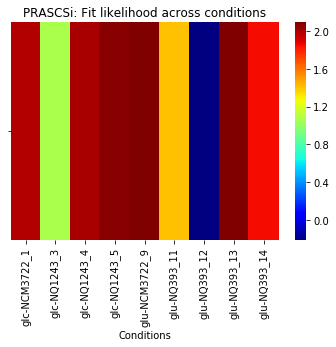

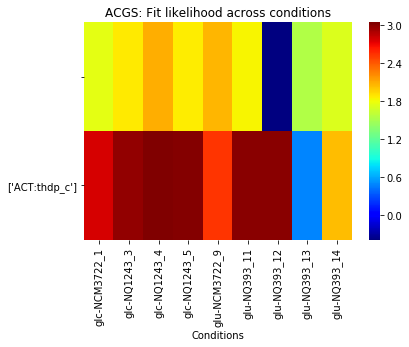

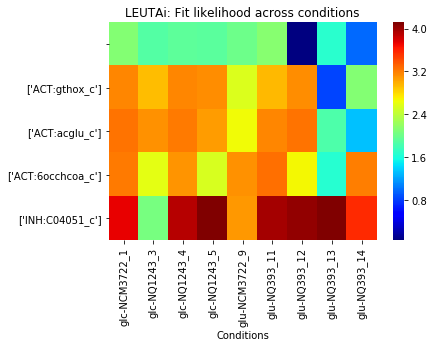

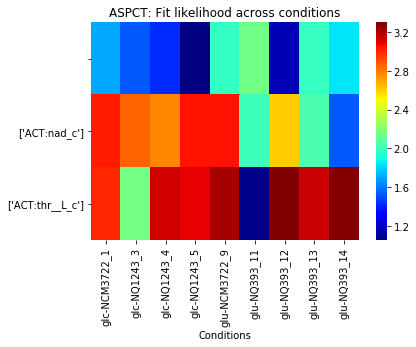

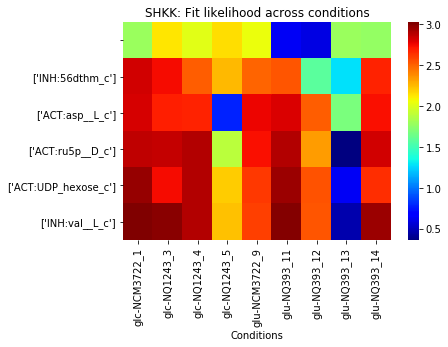

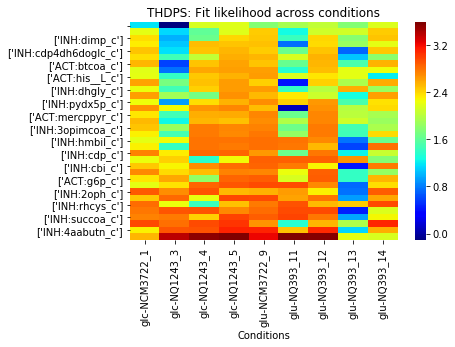

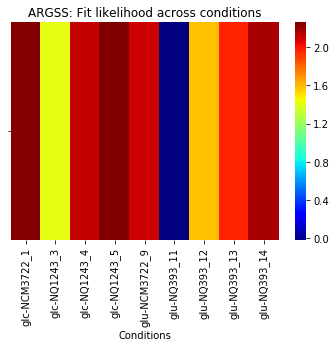

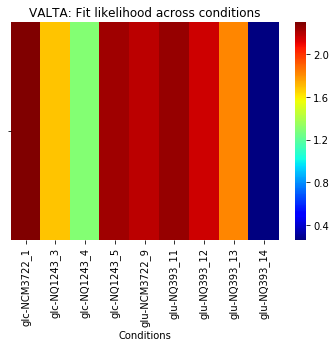

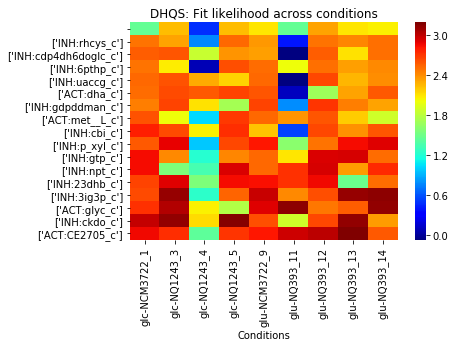

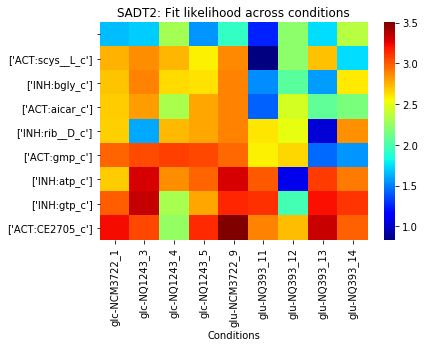

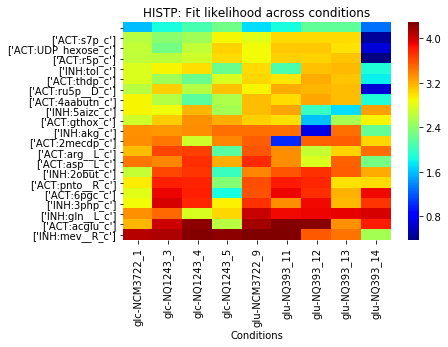

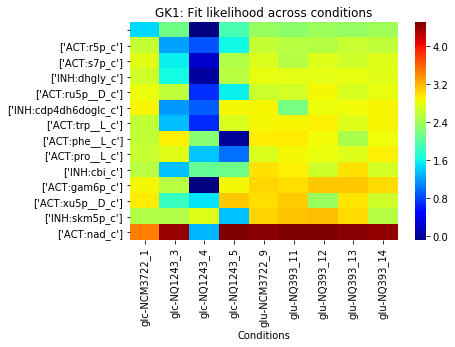

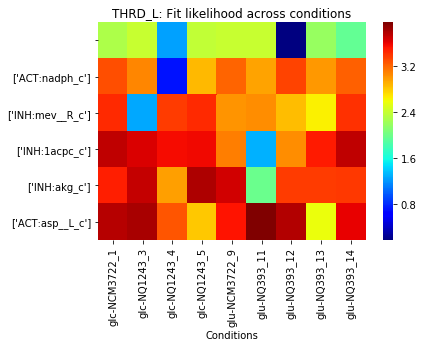

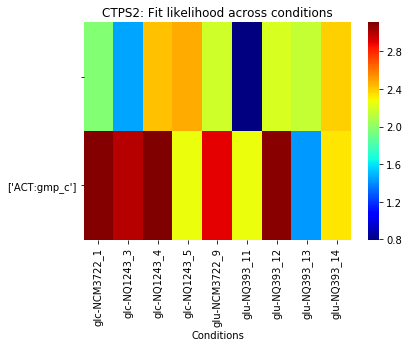

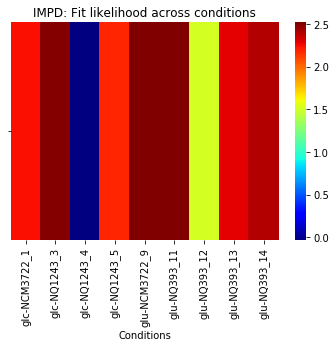

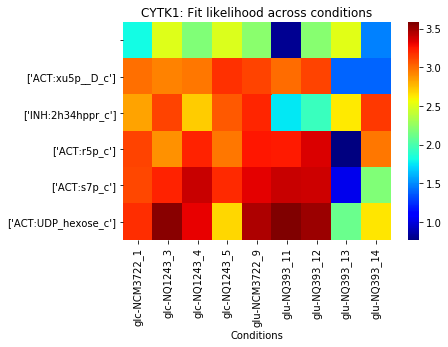

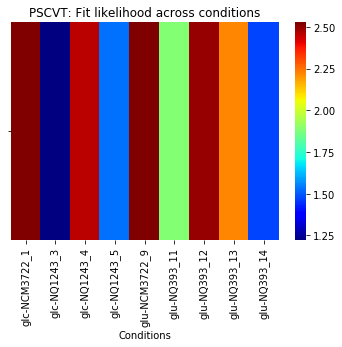

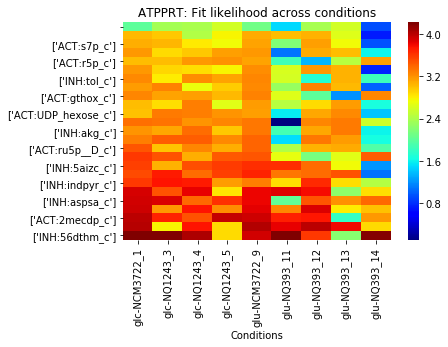

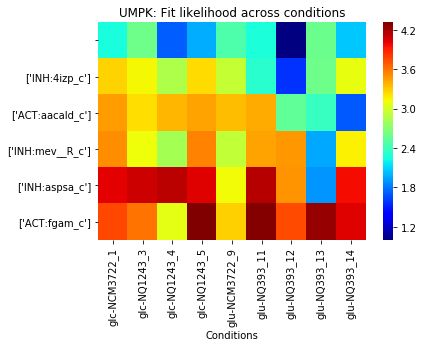

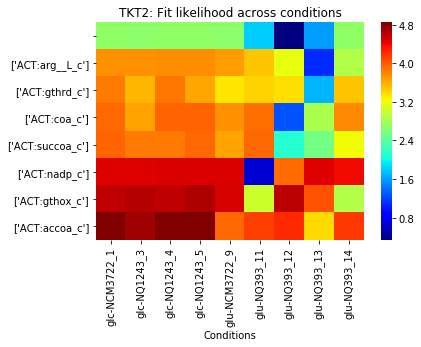

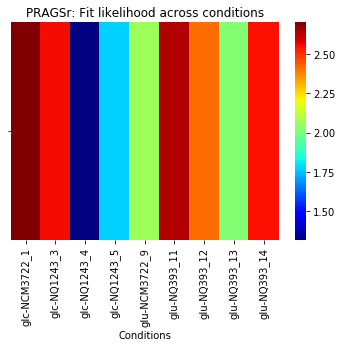

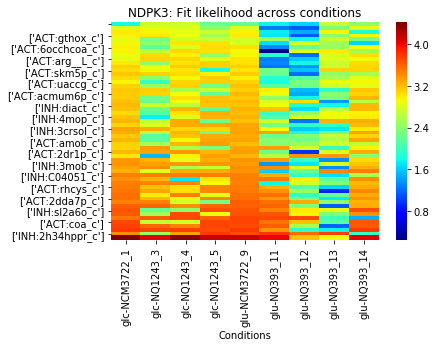

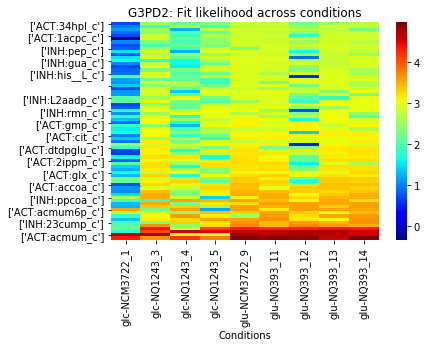

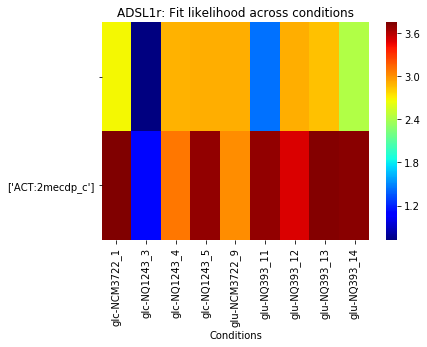

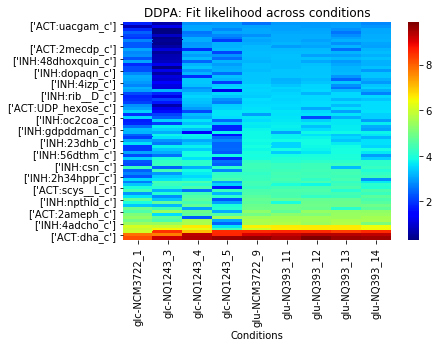

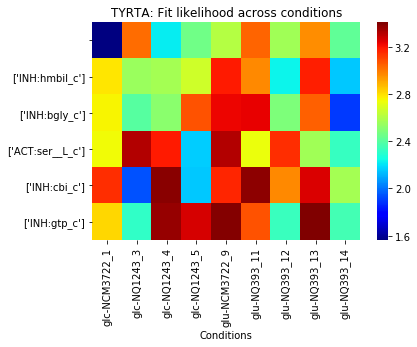

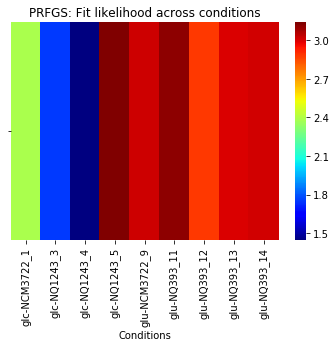

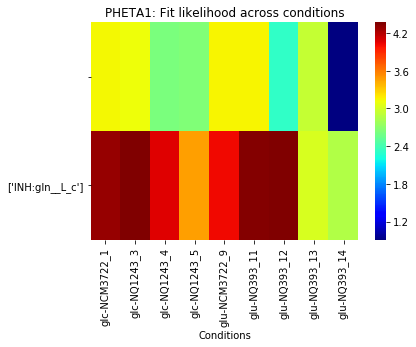

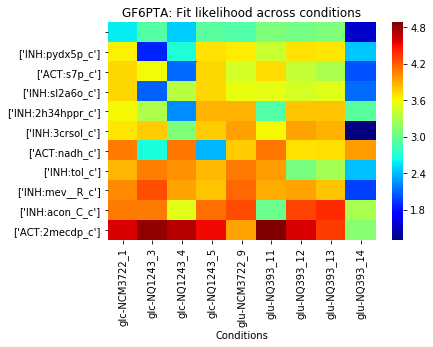

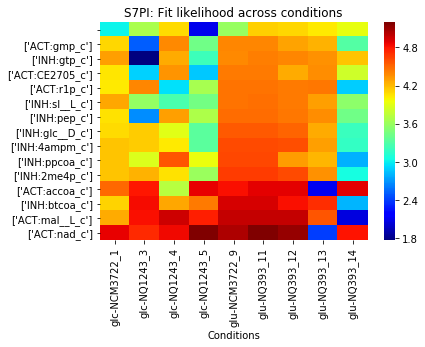

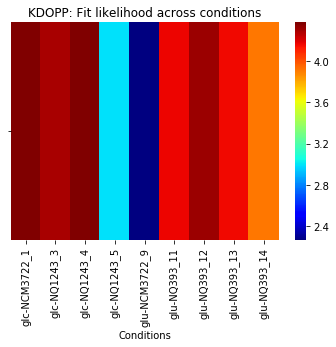

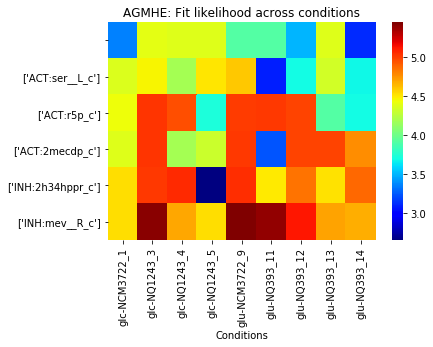

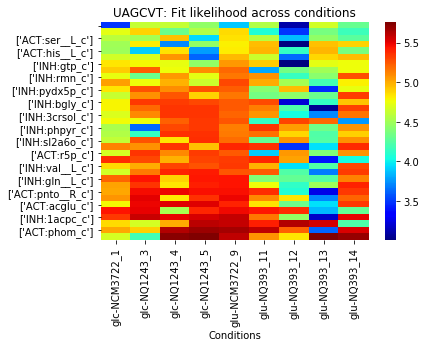

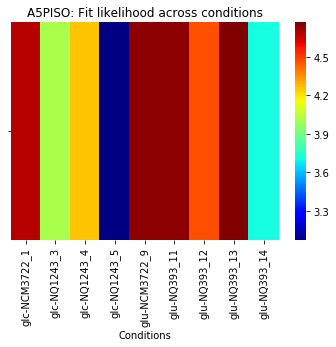

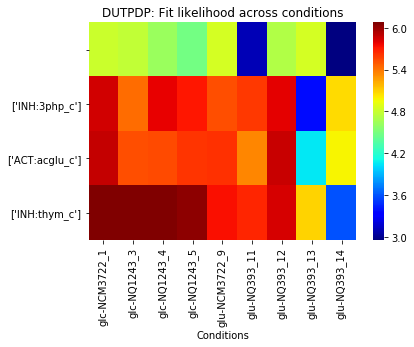

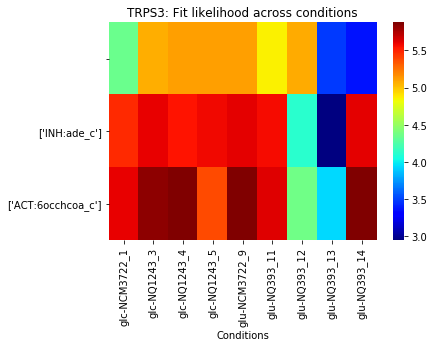

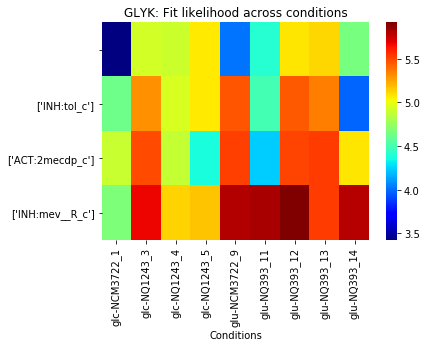

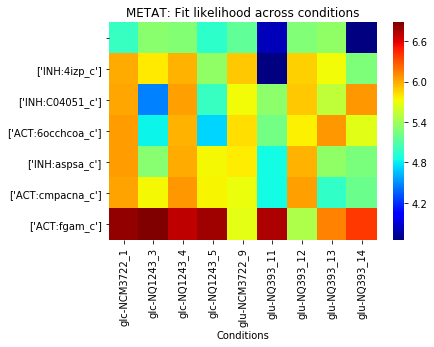

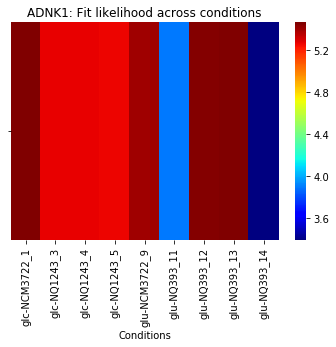

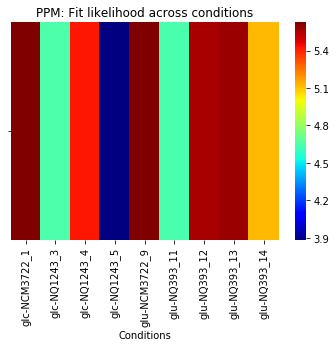

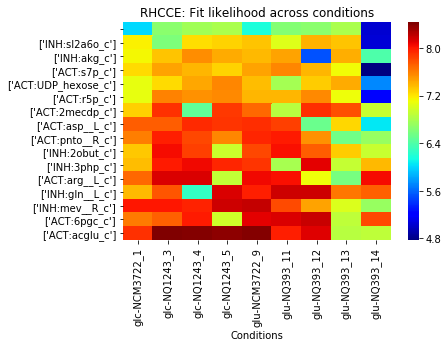

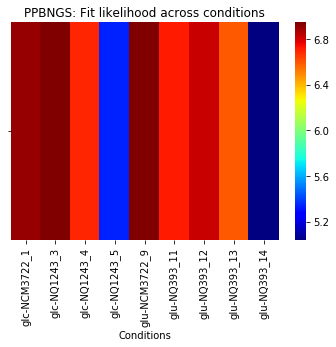

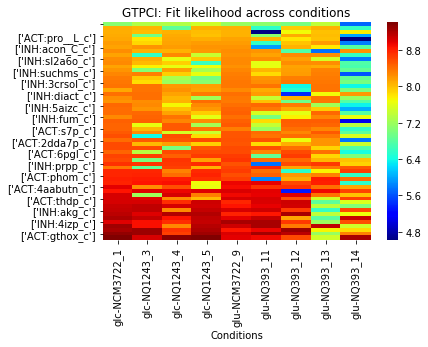

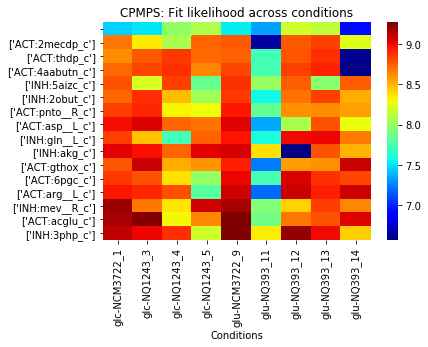

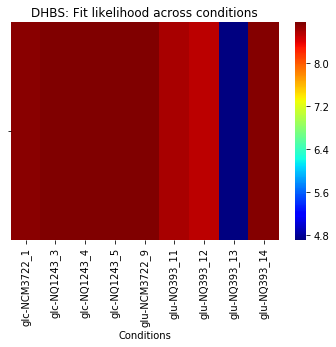

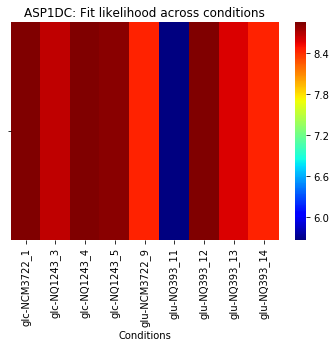

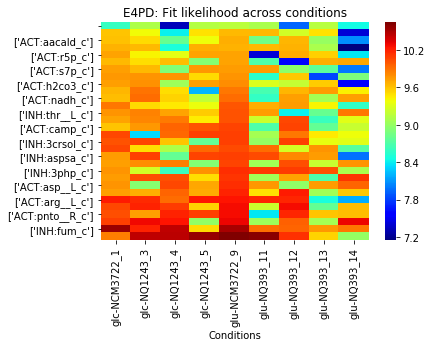

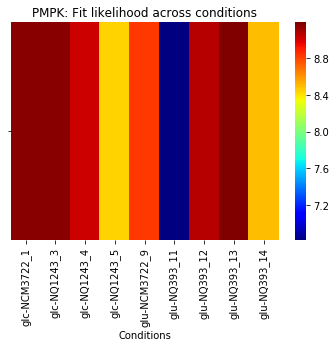

In [105]:
for rxn in list(reduced['rxn_id'].drop_duplicates()):
    arf.heatmap_across_conditions(reduced,rxn)

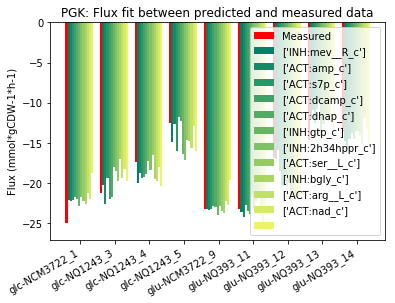

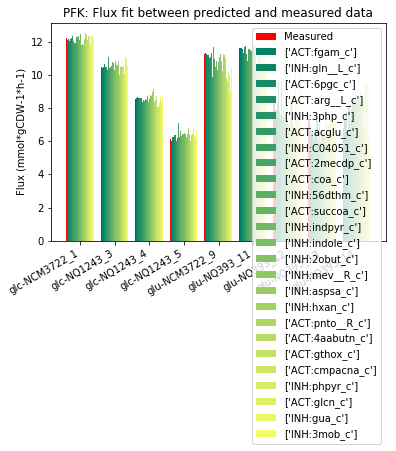

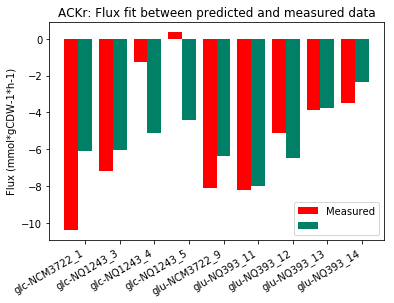

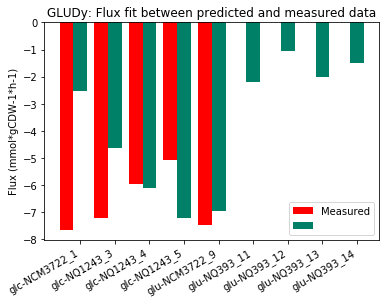

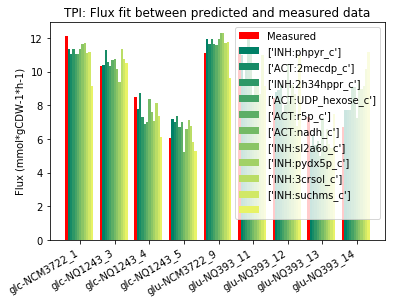

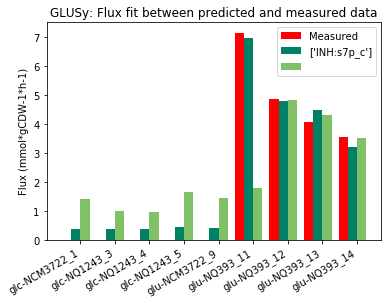

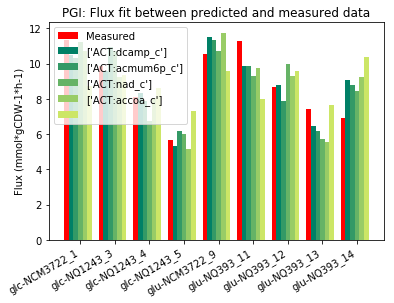

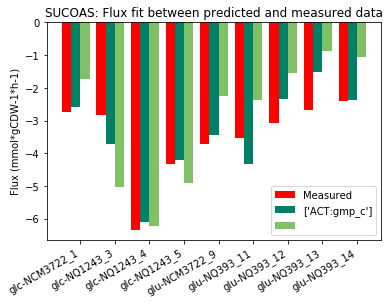

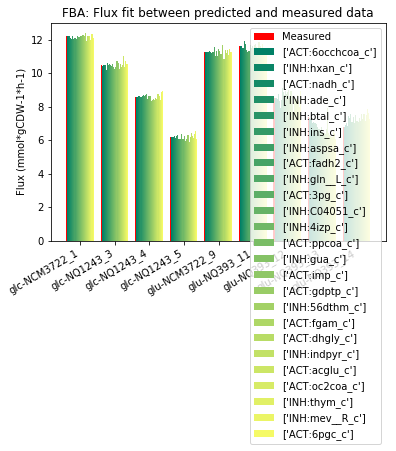

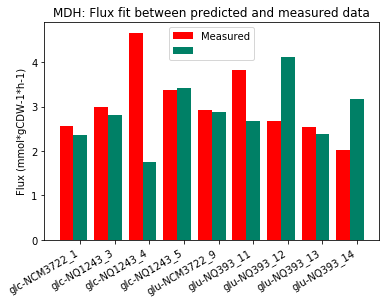

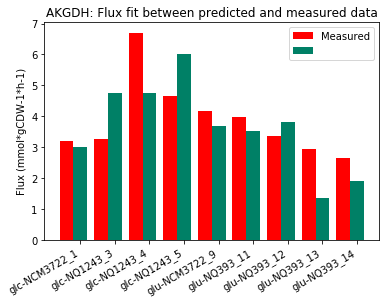

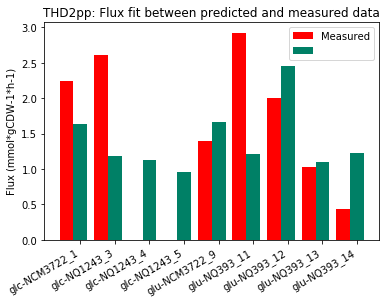

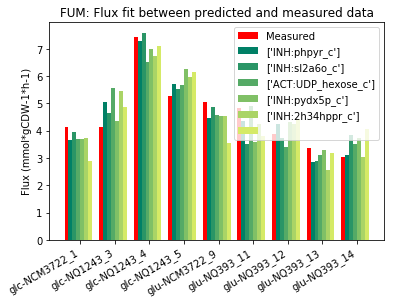

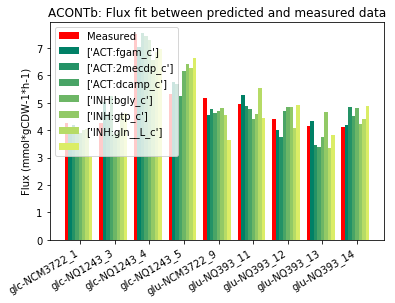

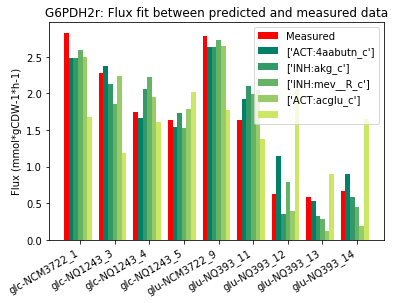

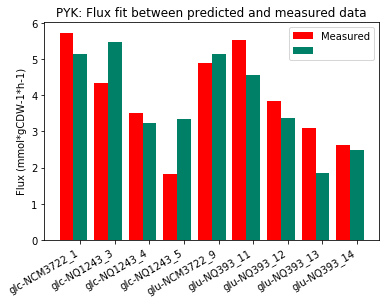

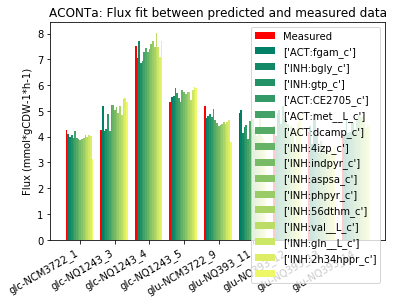

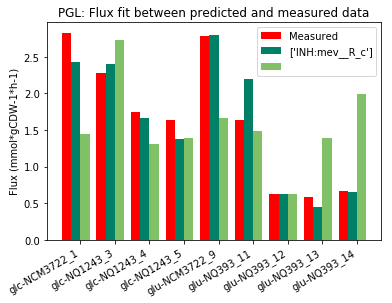

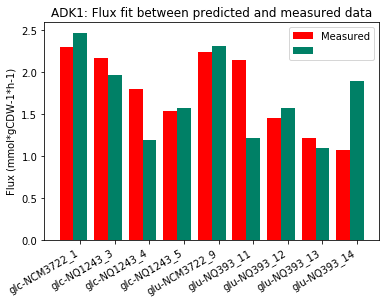

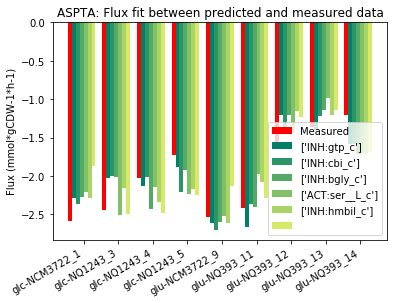

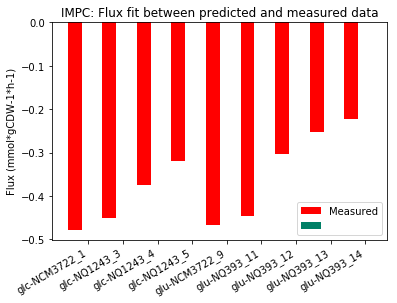

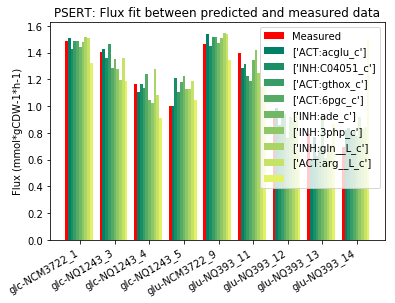

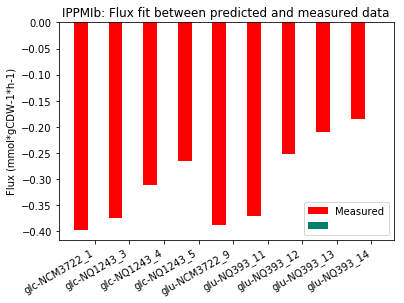

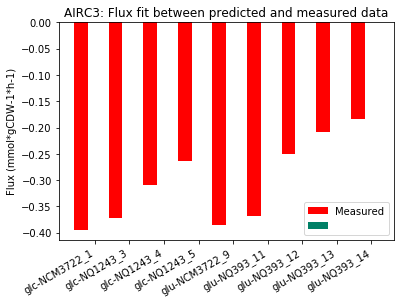

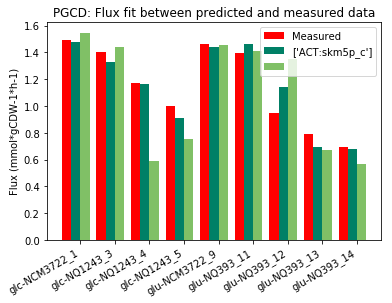

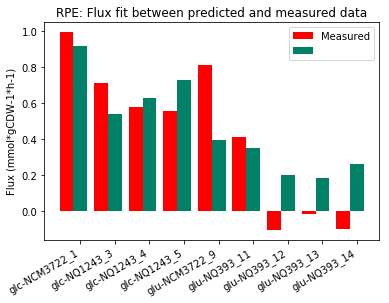

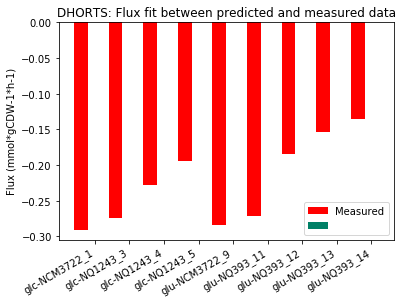

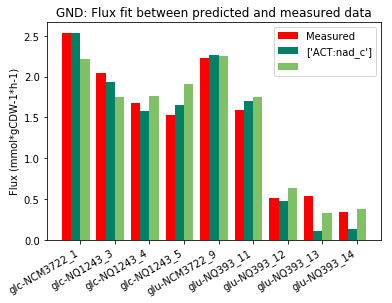

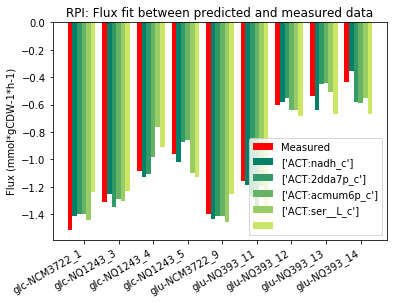

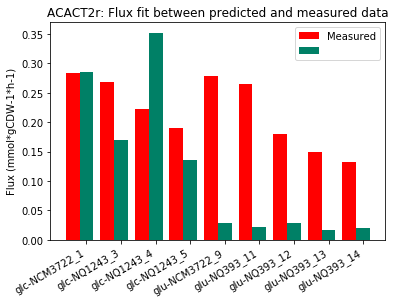

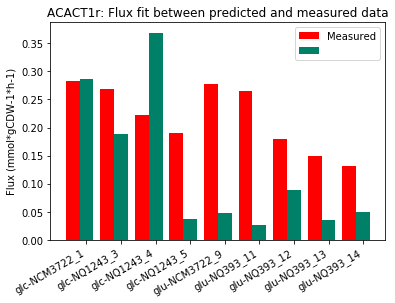

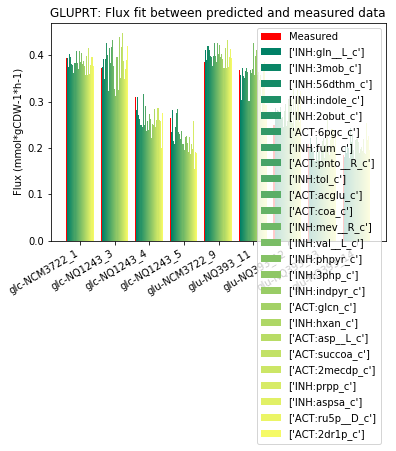

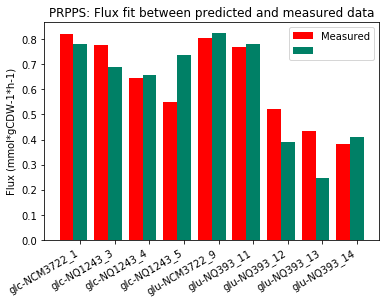

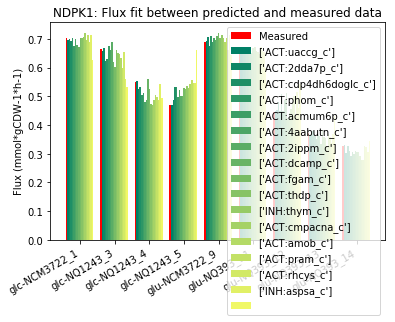

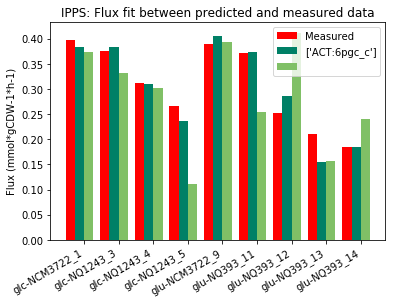

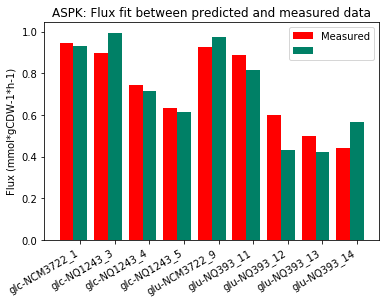

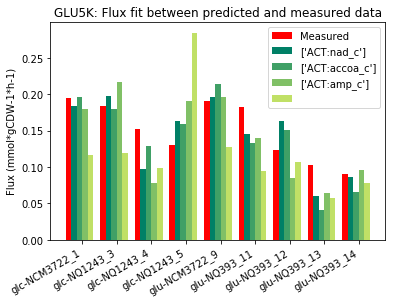

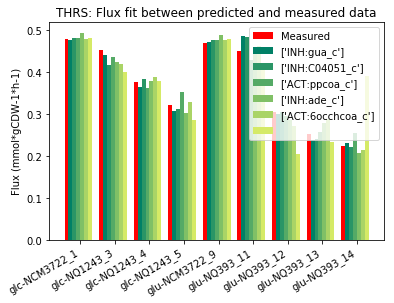

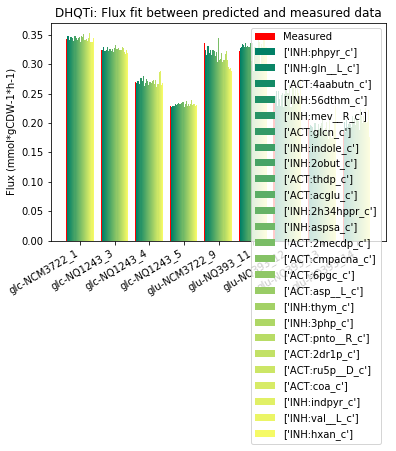

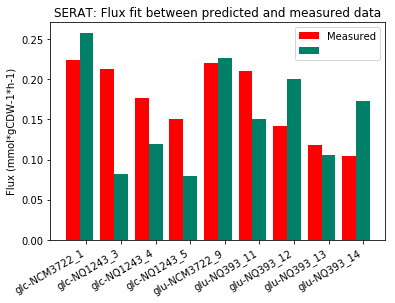

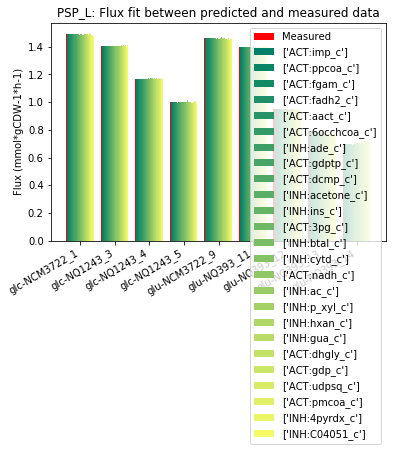

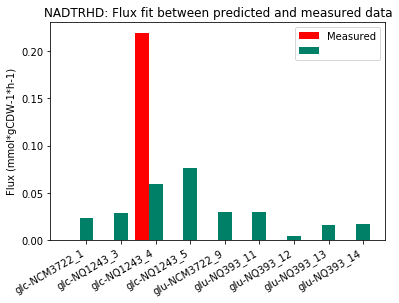

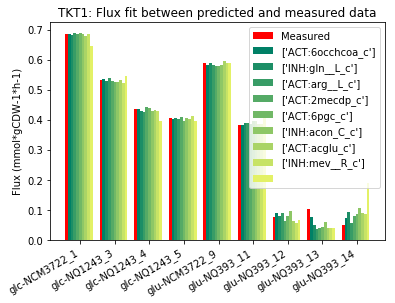

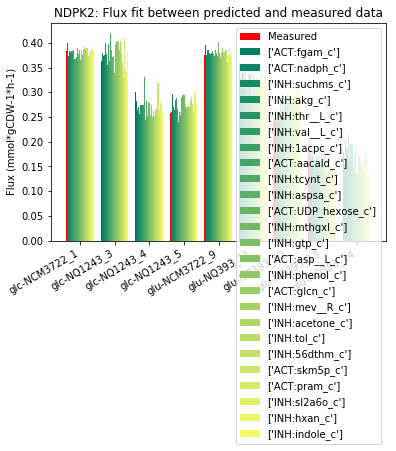

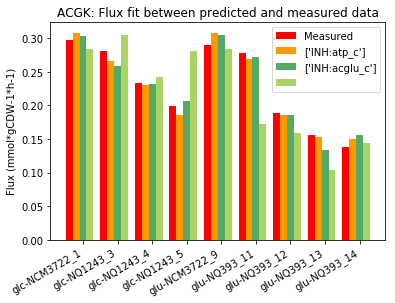

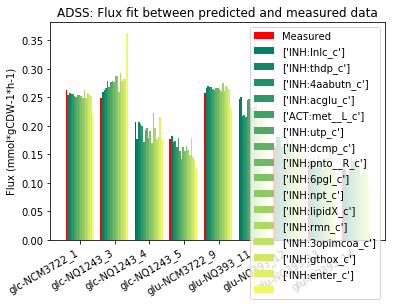

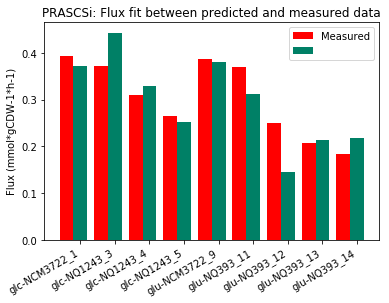

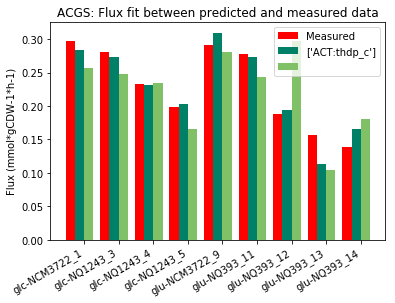

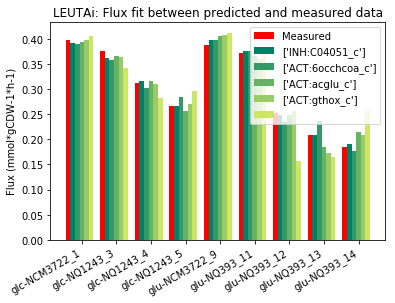

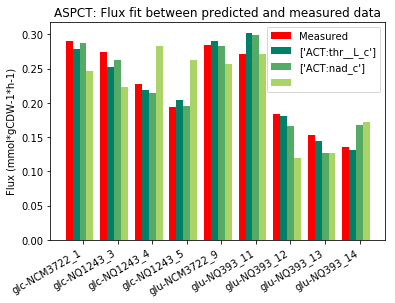

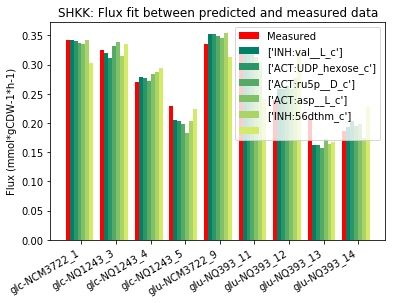

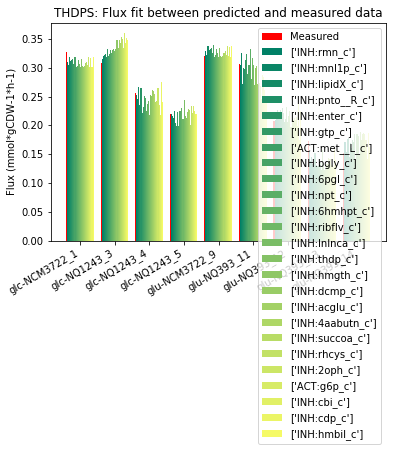

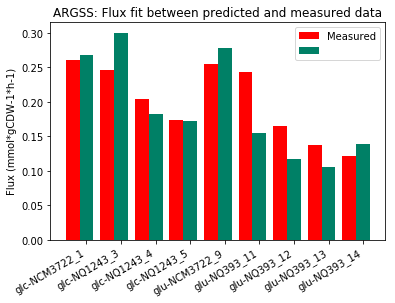

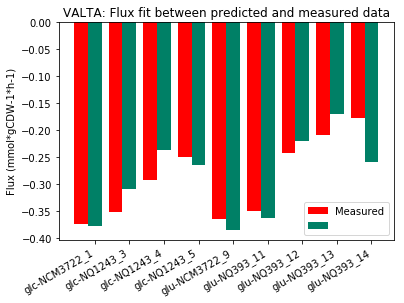

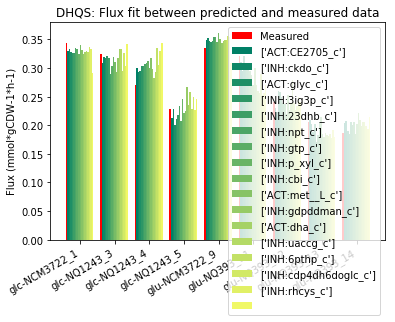

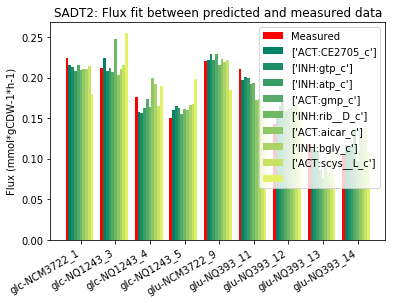

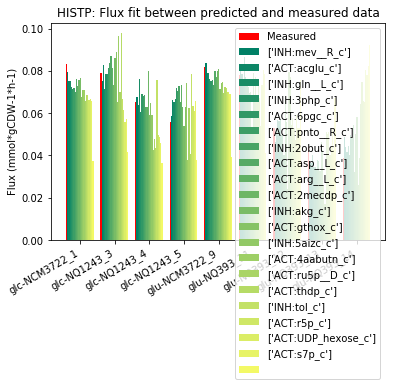

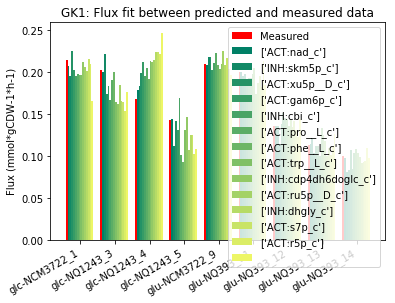

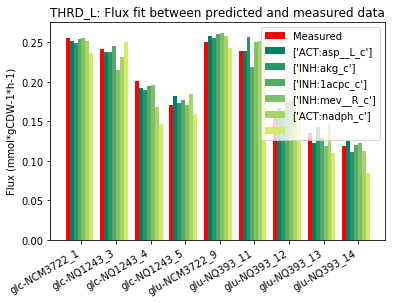

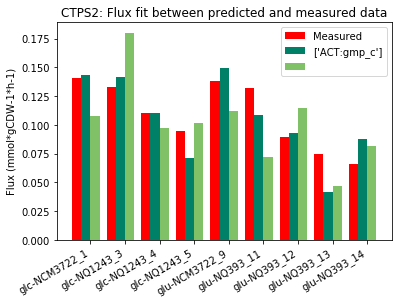

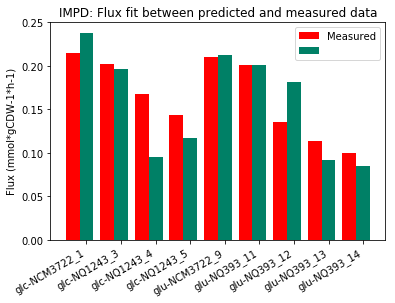

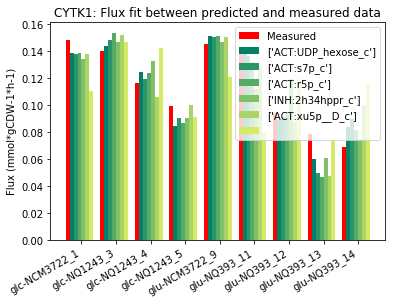

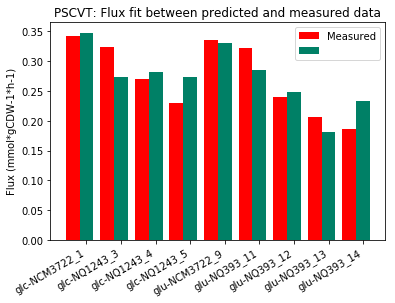

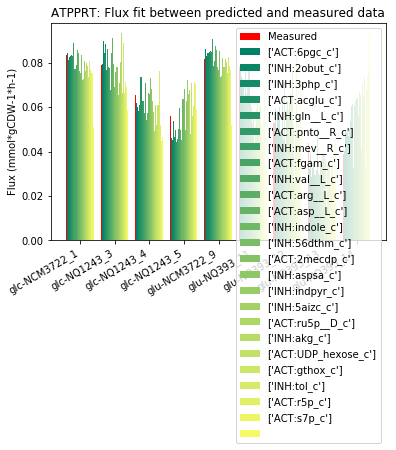

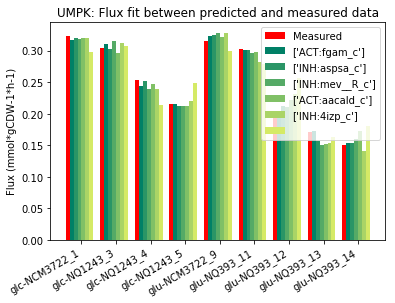

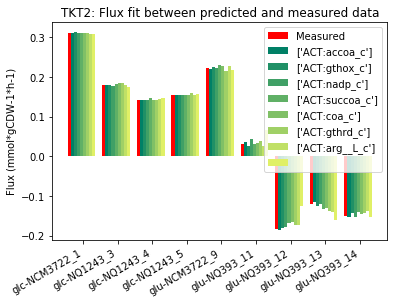

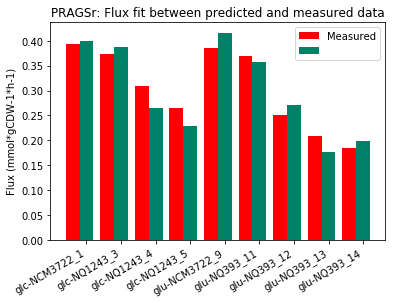

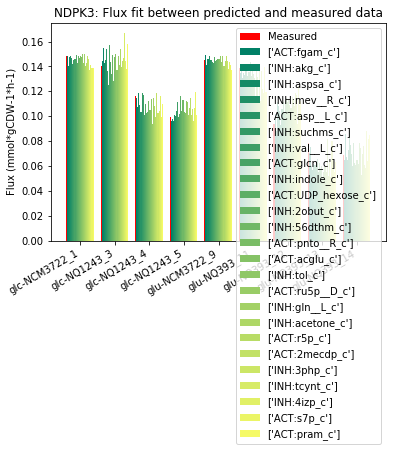

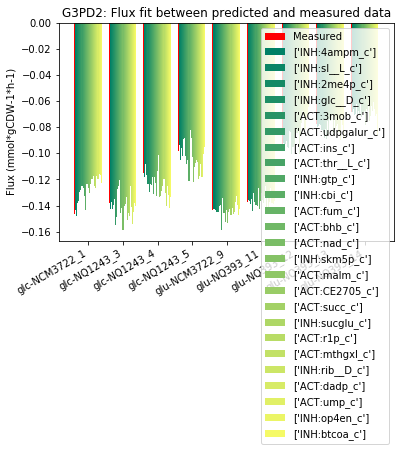

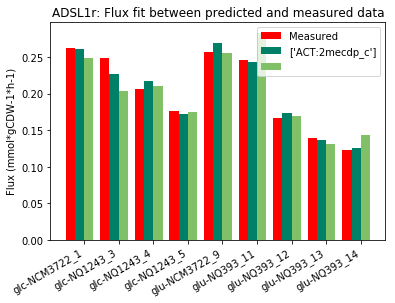

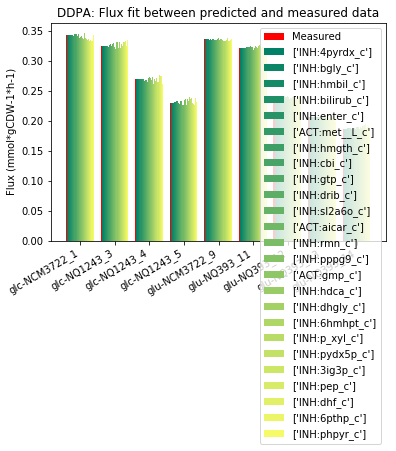

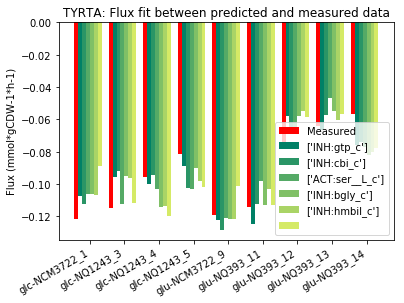

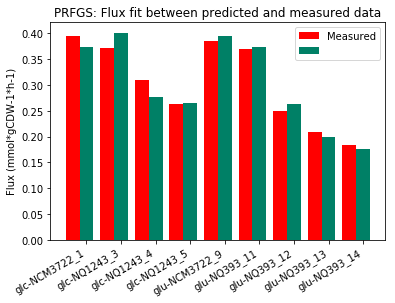

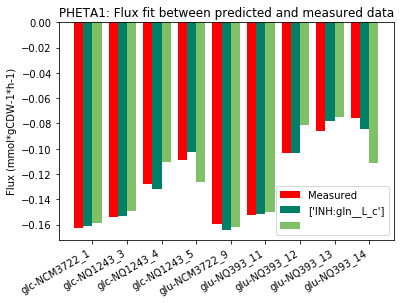

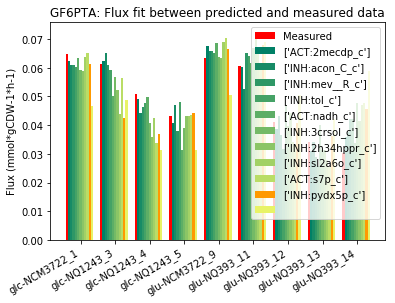

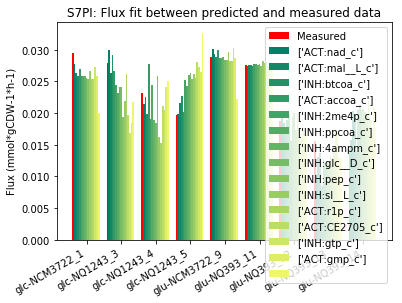

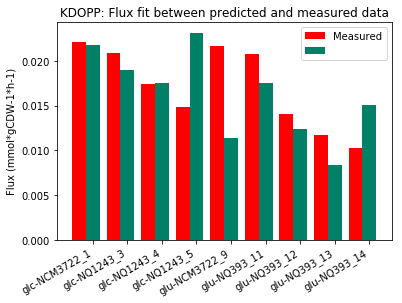

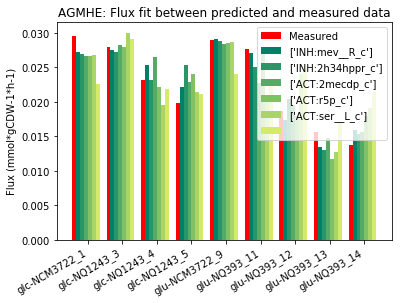

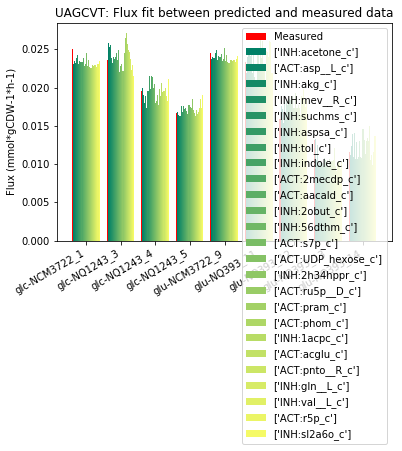

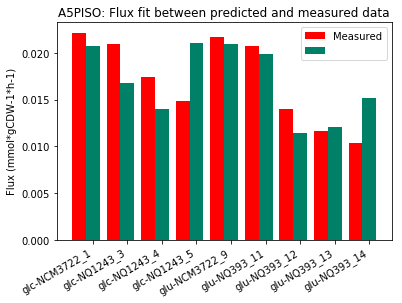

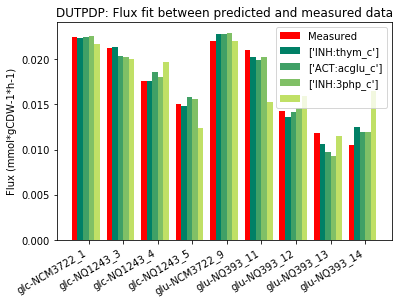

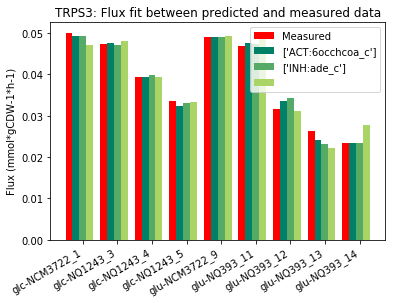

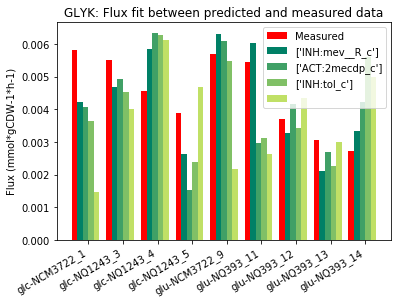

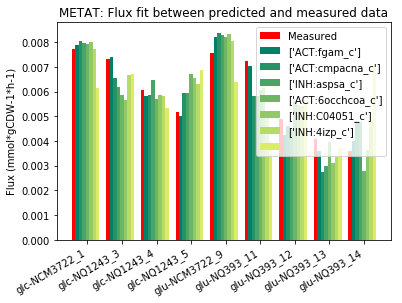

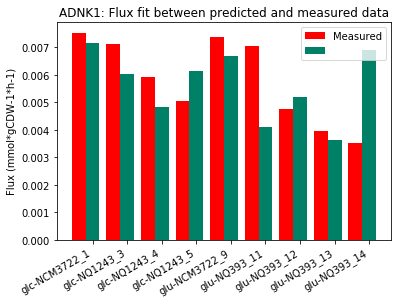

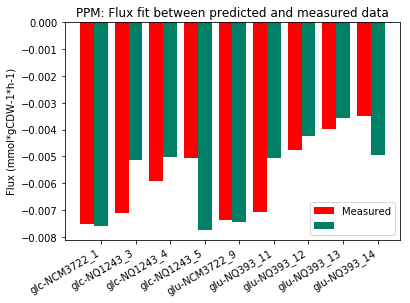

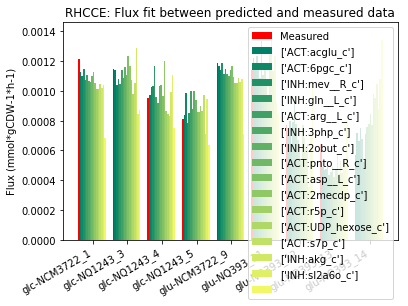

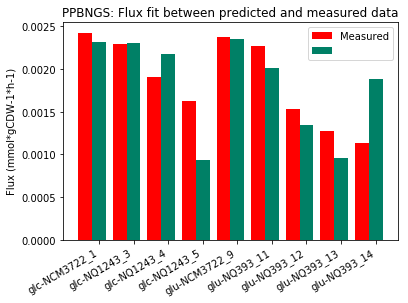

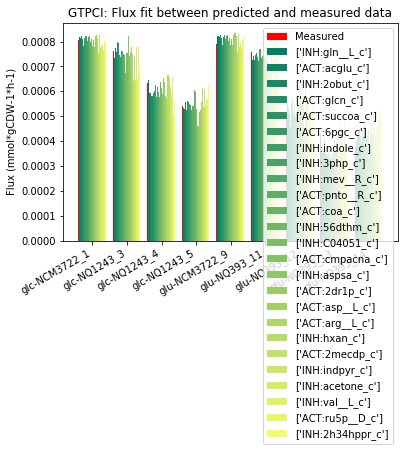

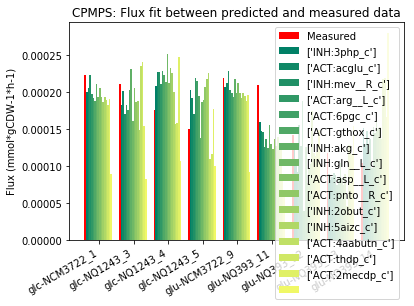

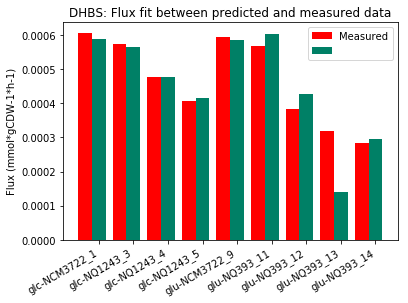

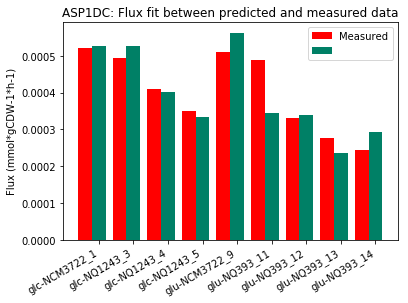

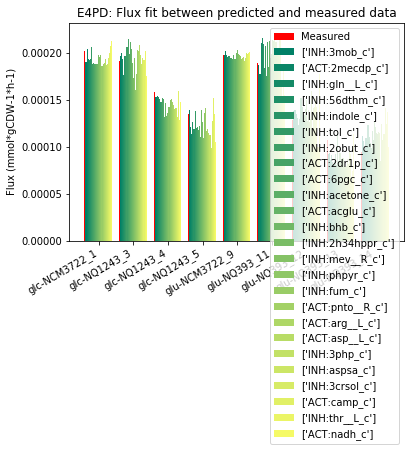

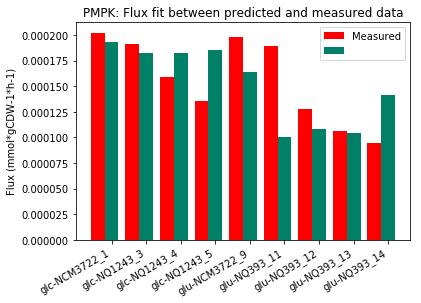

In [106]:
for rxn in list(reduced['rxn_id'].drop_duplicates()):
    arf.plot_fit(rxn,reduced,fullreg=reg_coli)

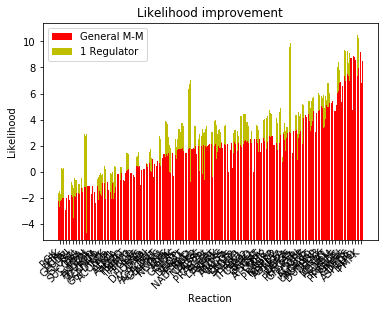

In [107]:
arf.plot_likelihood(reduced)